In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

df=pd.read_csv('deliveries.csv')
df


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [13]:
# Which batsman faced the most balls in the entire dataset?

balls=df.groupby('batsman')
most_balls=balls.size()
print('Top 10 batsman who faced most balls::', most_balls.sort_values(ascending=False).head(10))
most=most_balls.sort_values(ascending=False).head(10).index[0]
print(f'Batsman who faced most balls = {most}')

Top 10 batsman who faced most balls:: batsman
V Kohli       3494
G Gambhir     3433
SK Raina      3369
RG Sharma     3274
S Dhawan      3005
RV Uthappa    2960
DA Warner     2902
MS Dhoni      2680
AM Rahane     2602
CH Gayle      2532
dtype: int64
Batsman who faced most balls = V Kohli


In [26]:
# Which bowler has conceded the most runs in the dataset? 

runs=df.groupby('bowler')
total_runs=runs.sum()
total=total_runs['batsman_runs']+total_runs['extra_runs']+total_runs['total_runs']
print('Top 10 most runs conceded by the bowles are-',total.sort_values(ascending=False).head(10),sep='\n')
print('The most run conceded was conceded by',total.sort_values(ascending=False).head(10).index[0],'and total runs are',total.sort_values(ascending=False).head(10).values[0],sep='-')


Top 10 most runs conceded by the bowles are-
bowler
Harbhajan Singh    6906
P Kumar            6684
PP Chawla          6630
A Mishra           6610
SL Malinga         6068
R Vinay Kumar      5952
Z Khan             5720
DJ Bravo           5630
UT Yadav           5604
IK Pathan          5422
dtype: int64
The most run conceded was conceded by-Harbhajan Singh-and total runs are-6906


Which batsman has hit the most boundaries (fours and sixes combined)?

In [34]:
boundaries=df[(df['batsman_runs']==6) | (df['batsman_runs']==6)]
print('Total Boundaries=', boundaries ,sep='\n') 




Total Boundaries=
        match_id  inning                 batting_team                 bowling_team  over  ...  extra_runs total_runs player_dismissed dismissal_kind  fielder
10             1       1          Sunrisers Hyderabad  Royal Challengers Bangalore     2  ...           0          6              NaN            NaN      NaN
47             1       1          Sunrisers Hyderabad  Royal Challengers Bangalore     8  ...           0          6              NaN            NaN      NaN
75             1       1          Sunrisers Hyderabad  Royal Challengers Bangalore    13  ...           0          6              NaN            NaN      NaN
89             1       1          Sunrisers Hyderabad  Royal Challengers Bangalore    15  ...           0          6              NaN            NaN      NaN
91             1       1          Sunrisers Hyderabad  Royal Challengers Bangalore    15  ...           0          6              NaN            NaN      NaN
...          ...     ...          

In [38]:
batsman_boundary=boundaries.groupby('batsman')
most_boundaries=batsman_boundary.size()
print('TOP 10 batsman with most boundaries are==')
most_boundaries.sort_values(ascending=False).head(10)

TOP 10 batsman with most boundaries are==


batsman
CH Gayle          266
SK Raina          174
RG Sharma         173
V Kohli           160
DA Warner         160
AB de Villiers    158
MS Dhoni          156
YK Pathan         149
KA Pollard        148
Yuvraj Singh      141
dtype: int64

In [39]:
print(f'{most_boundaries.sort_values(ascending=False).head(10).index[0]} is the batsman with highest boundary of {most_boundaries.sort_values(ascending=False).head(10).values[0]} boundaries.')


CH Gayle is the batsman with highest boundary of 266 boundaries.


Which team gave the most extras (wides, byes, legbyes, etc.)?

In [47]:
bowling_team=df.groupby('bowling_team') 
bowling_team=bowling_team.sum()
bowling_team

,match_id,inning,batting_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
bowling_team,,,,,,,,,,,,,,,,,,,,
Chennai Super Kings,5012821,24511,Kings XI PunjabKings XI PunjabKings XI PunjabK...,158100,56138,K GoelK GoelK GoelK GoelJR HopesJR HopesK Goel...,JR HopesJR HopesJR HopesJR HopesK GoelK GoelJR...,JDP OramJDP OramJDP OramJDP OramJDP OramJDP Or...,4,526,59,361,56,0,18788,1002,19790,K GoelJR HopesYuvraj SinghKC SangakkaraL Ronch...,caughtcaughtcaughtcaughtrun outcaughtbowledbow...,PA PatelJoginder SharmaP AmarnathJoginder Shar...
Deccan Chargers,1910322,14094,Kolkata Knight RidersKolkata Knight RidersKolk...,92374,32738,WP SahaBB McCullumBB McCullumBB McCullumWP Sah...,BB McCullumWP SahaWP SahaWP SahaBB McCullumBB ...,WPUJC VaasWPUJC VaasWPUJC VaasWPUJC VaasWPUJC ...,0,328,62,215,49,5,10959,659,11618,BB McCullumRT PontingWP SahaSC GangulyMohammad...,caughtlbwcaughtbowledcaughtcaughtcaughtcaughtb...,RG SharmaSB StyrisA SymondsAC GilchristSB Bang...
Delhi Daredevils,5324224,23883,Royal Challengers BangaloreRoyal Challengers B...,173013,61846,CH GayleSR WatsonSR WatsonSR WatsonSR WatsonSR...,SR WatsonCH GayleCH GayleCH GayleCH GayleCH Ga...,Z KhanZ KhanZ KhanZ KhanZ KhanZ KhanCH MorrisC...,6,614,76,409,88,0,21156,1187,22343,CH GayleMandeep SinghSR WatsonSTR BinnyVishnu ...,caughtbowledstumpedcaughtrun outcaughtbowledbo...,SV SamsonRR PantSW BillingsS NadeemCH MorrisSV...
Gujarat Lions,1203688,5125,Kolkata Knight RidersKolkata Knight RidersKolk...,35824,12711,G GambhirCA LynnCA LynnG GambhirG GambhirCA Ly...,CA LynnG GambhirG GambhirCA LynnCA LynnG Gambh...,P KumarP KumarP KumarP KumarP KumarP KumarDS K...,5,107,10,64,7,0,4902,188,5090,S DhawanAM RahaneRA TripathiSPD SmithBA Stokes...,caughtcaughtcaughtcaughtbowledlbwcaughtcaughtb...,BB McCullumSK RainaAJ FinchAJ FinchBB McCullum...
Kings XI Punjab,5554878,26113,Rising Pune SupergiantRising Pune SupergiantRi...,175263,62938,AM RahaneMA AgarwalMA AgarwalMA AgarwalMA Agar...,MA AgarwalAM RahaneAM RahaneAM RahaneAM Rahane...,Sandeep SharmaSandeep SharmaSandeep SharmaSand...,9,668,83,392,87,0,22040,1230,23270,MA AgarwalAM RahaneSPD SmithMS DhoniBA StokesD...,bowledcaughtcaughtcaught and bowledcaught and ...,MP StoinisM VohraGJ MaxwellGJ MaxwellWP SahaAR...
Kochi Tuskers Kerala,431373,2388,Royal Challengers BangaloreRoyal Challengers B...,15883,5847,MA AgarwalTM DilshanTM DilshanTM DilshanMA Aga...,TM DilshanMA AgarwalMA AgarwalMA AgarwalTM Dil...,RP SinghRP SinghRP SinghRP SinghRP SinghRP Sin...,0,56,5,41,8,0,1876,110,1986,TM DilshanV KohliMA AgarwalSS TiwaryJD RyderGC...,caughtlbwcaughtcaughtcaught and bowledcaughtca...,BB McCullumR Vinay KumarDPMD JayawardeneRP Sin...
Kolkata Knight Riders,5571551,25029,Gujarat LionsGujarat LionsGujarat LionsGujarat...,176068,62814,JJ RoyJJ RoyJJ RoyJJ RoyJJ RoyJJ RoyBB McCullu...,BB McCullumBB McCullumBB McCullumBB McCullumBB...,TA BoultTA BoultTA BoultTA BoultTA BoultTA Bou...,10,658,98,382,66,0,20831,1204,22035,JJ RoyBB McCullumAJ FinchKD KarthikPA PatelJC ...,caughtlbwcaughtcaughtlbwlbwlbwcaughtcaughtcaug...,YK PathanKuldeep YadavKuldeep YadavRV UthappaR...
Mumbai Indians,6002831,28503,Rising Pune SupergiantRising Pune SupergiantRi...,192655,68579,AM RahaneMA AgarwalMA AgarwalMA AgarwalAM Raha...,MA AgarwalAM RahaneAM RahaneAM RahaneMA Agarwa...,TG SoutheeTG SoutheeTG SoutheeTG SoutheeTG Sou...,8,786,96,414,96,5,22438,1397,23835,MA AgarwalAM RahaneBA StokesG GambhirRV Uthapp...,caughtcaughtcaughtcaughtcaughtlbwcaughtcaughtc...,RG SharmaN RanaTG SoutheeMJ McClenaghanHH Pand...
Pune Warriors,1889413,7768,Kings XI PunjabKings XI PunjabKings XI PunjabK...,55674,19587,AC GilchristAC GilchristSE MarshAC GilchristPC...,SE MarshSE MarshAC GilchristSE MarshSE MarshSE...,AC ThomasAC ThomasAC ThomasAC ThomasAC ThomasA...,0,174,38,97,26,0,6522,335,6857,AC GilchristSE MarshPC ValthatyKD KarthikSunny...,caughtcaughtcaugh

In [43]:
df 

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [48]:
extra_runs=bowling_team['extra_runs']+bowling_team['penalty_runs']+bowling_team['noball_runs']+bowling_team['legbye_runs']+bowling_team['bye_runs']+bowling_team['wide_runs']
extra_runs

bowling_team
Chennai Super Kings            2004
Deccan Chargers                1318
Delhi Daredevils               2374
Gujarat Lions                   376
Kings XI Punjab                2460
Kochi Tuskers Kerala            220
Kolkata Knight Riders          2408
Mumbai Indians                 2794
Pune Warriors                   670
Rajasthan Royals               2116
Rising Pune Supergiant          222
Rising Pune Supergiants         216
Royal Challengers Bangalore    2618
Sunrisers Hyderabad             974
dtype: int64

In [50]:
extra=extra_runs.sort_values(ascending=False)
print('Top 10 team that gave most extras are==',extra)
print(f'The team that gave the most extra is {extra.index[0]} with total {extra.values[0]} extra runs.')

Top 10 team that gave most extras are== bowling_team
Mumbai Indians                 2794
Royal Challengers Bangalore    2618
Kings XI Punjab                2460
Kolkata Knight Riders          2408
Delhi Daredevils               2374
Rajasthan Royals               2116
Chennai Super Kings            2004
Deccan Chargers                1318
Sunrisers Hyderabad             974
Pune Warriors                   670
Gujarat Lions                   376
Rising Pune Supergiant          222
Kochi Tuskers Kerala            220
Rising Pune Supergiants         216
dtype: int64
The top most team that gave the most extra is Mumbai Indians with total 2794 extra runs.


What is the total number of balls bowled in powerplays (1-6 overs)?

In [58]:
power_plays=df[df['over']<=6]
# power_plays
print('The total number of balls bowled in powerplays are=',power_plays['ball'].count())

The total number of balls bowled in powerplays are= 47683


Which batsman hit the most fours in the dataset?

In [4]:
fours=df[df['batsman_runs']==4]
fours



,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
13,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,7,MC Henriques,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
30,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,5,5,MC Henriques,S Dhawan,S Aravind,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
32,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,6,1,S Dhawan,MC Henriques,SR Watson,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150403,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,11,4,V Kohli,AB de Villiers,BCJ Cutting,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150407,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,12,2,V Kohli,AB de Villiers,Bipul Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150418,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,14,1,KL Rahul,AB de Villiers,Bipul Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150447,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,18,6,Sachin Baby,STR Binny,B Kumar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [5]:
batsman_with_four=fours.groupby('batsman')
batsman_with_four

Top 10 Batsman with most four's are= batsman
G Gambhir     484
SK Raina      402
DA Warner     401
S Dhawan      401
V Kohli       384
RV Uthappa    377
RG Sharma     354
V Sehwag      334
AM Rahane     320
CH Gayle      297
dtype: int64
The batsman with most four is  G Gambhir  with  484  fours.


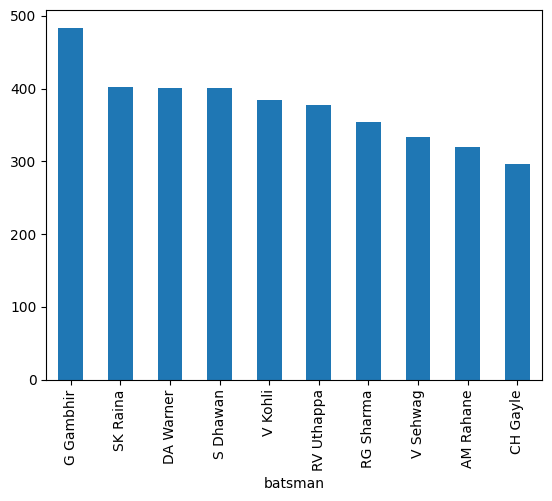

In [12]:
batsman_with_most_four=batsman_with_four.size().sort_values(ascending=False)
print('Top 10 Batsman with most four\'s are=',batsman_with_most_four.head(10))
batsman_with_most_four.head(10).plot(kind='bar')
print('The batsman with most four is ',batsman_with_most_four.head(10).index[0],' with ' , batsman_with_most_four.head(10).values[0], ' fours.')

Which bowler has bowled the most dot balls?

In [13]:
dot_ball=df[df['total_runs']==0]
dot_ball

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150438,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,17,3,SR Watson,Sachin Baby,Mustafizur Rahman,0,...,0,0,0,0,0,0,0,SR Watson,caught,MC Henriques
150442,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,18,1,STR Binny,Sachin Baby,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
150445,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,18,4,STR Binny,Sachin Baby,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
150450,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,3,CJ Jordan,Sachin Baby,Mustafizur Rahman,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [20]:
dot_ball_bowler=dot_ball.groupby('bowler')
dot_ball_bowler

In [21]:
dot_bowler=dot_ball_bowler.size().sort_values(ascending=False)
dot_bowler

bowler
P Kumar            1075
Harbhajan Singh    1062
SL Malinga         1060
DW Steyn            978
A Mishra            953
                   ... 
V Shankar             1
FY Fazal              1
RW Price              1
C Ganapathy           1
AC Gilchrist          1
Length: 347, dtype: int64

TOp 10 bowlers with dot balls are==


<Axes: xlabel='bowler'>

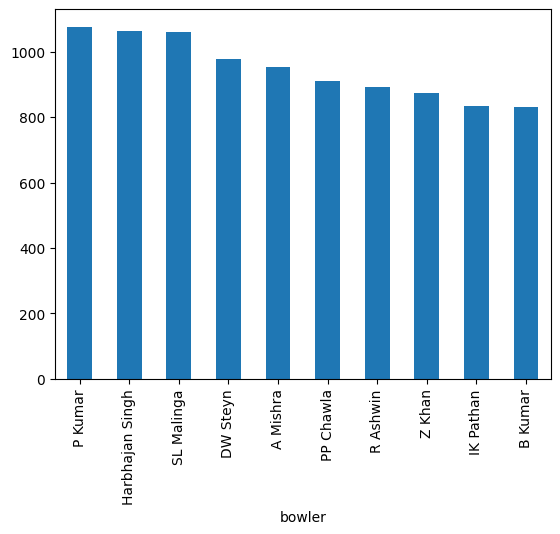

In [24]:
print('TOp 10 bowlers with dot balls are==')
dot_bowler.head(10).plot(kind='bar')

In [27]:
print('TOp bowler with most dot balls is ',dot_bowler.head(10).index[0] , ' with total ',dot_bowler.head(10).values[0],' balls.')


TOp bowler with most dot balls is  P Kumar  with total  1075  balls.


Which team scored the most runs in a single match?

In [38]:
batting_team = df.groupby(['match_id', 'batting_team'])['total_runs'].sum()
batting_team

match_id  batting_team               
1         Royal Challengers Bangalore    172
          Sunrisers Hyderabad            207
2         Mumbai Indians                 184
          Rising Pune Supergiant         187
3         Gujarat Lions                  183
                                        ... 
634       Sunrisers Hyderabad            162
635       Gujarat Lions                  162
          Sunrisers Hyderabad            163
636       Royal Challengers Bangalore    200
          Sunrisers Hyderabad            208
Name: total_runs, Length: 1270, dtype: int64

In [39]:
batting_team_run_highest = batting_team.sort_values(ascending=False)
batting_team_run_highest

match_id  batting_team               
411       Royal Challengers Bangalore    263
620       Royal Challengers Bangalore    248
206       Chennai Super Kings            246
61        Chennai Super Kings            240
562       Royal Challengers Bangalore    235
                                        ... 
103       Chennai Super Kings             55
27        Royal Challengers Bangalore     49
57        Kolkata Knight Riders           48
489       Sunrisers Hyderabad             44
571       Royal Challengers Bangalore      2
Name: total_runs, Length: 1270, dtype: int64

In [40]:
batting_team_run_highest.head(1) 

match_id  batting_team               
411       Royal Challengers Bangalore    263
Name: total_runs, dtype: int64

Which batsman scored the fastest 50 in the dataset?

In [42]:
batsmans=df.groupby('batsman')
batsmans.size()
for batsman in batsmans:
    runs=df[df['batsman']==batsman]['total_runs']
    

batsman
A Ashish Reddy     196
A Chandila           7
A Chopra            75
A Choudhary         20
A Flintoff          57
                  ... 
YV Takawale        183
Yashpal Singh       67
Younis Khan          7
Yuvraj Singh      2050
Z Khan             141
Length: 461, dtype: int64